# 2.1 Plotting Data

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
# Read Data from txt File
ex1df = pd.read_csv("ex1.txt", header=None)
ex1df.columns = ["Population($0000's)","Profit($0000's)"]
ex1df.head()

,Population($0000's),Profit($0000's)
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


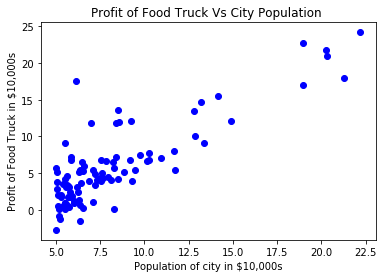

In [182]:
plt.scatter(ex1df.iloc[:,0],ex1df.iloc[:,1],color = "blue" )
plt.xlabel("Population of city in $10,000s")
plt.ylabel("Profit of Food Truck in $10,000s")
plt.title("Profit of Food Truck Vs City Population ")
plt.show()

# 2.2 Gradient Descent

## 2.2.1 Update Equations
The Goal of Gradient Descent is to minimise the cost function:
\begin{equation*}
J\left(\theta\right)= \sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2 
\end{equation*}
where the hypothesis $ h_\theta(x)= \theta'x = \theta_0 + \theta_1 x_1$

## 2.2.1 Implementation

In [59]:
# Number of training examples
m = len(ex1df.iloc[:,1])
m

97

In [60]:
# COnverting ex1df to arrays
ex1_array = ex1df.values
X0 = ex1_array[:,0].reshape(m,1)
y = ex1_array[:,1].reshape(m,1)
X0.shape

(97, 1)

In [161]:
# Adding a column of ones to x for the intercept term
X = np.hstack((np.ones([m,1]),X0))
theta = np.zeros((2,1))
iterations = 1500
alpha = 0.01
#X.shape
#pd.DataFrame(X).head()

,0,1
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598


## 2.2.3 Computing the cost function $J(\theta)$

In [48]:
sum([1,2,3])

6

In [75]:
def computeCost(X,y,theta):
    J = 0
    predictions = X.dot(theta) 
    sqerrors = (predictions - y)**2
    J = 1/(2*m)*sum(sqerrors)
    return J[0]
computeCost(X,y,theta)

32.072733877455654

## 2.2.4 Gradient Descent

In [165]:
def gradientDescent(X,y,theta,alpha,num_iters):
    J_history = np.zeros((num_iters,1))
    
    for iter in range(num_iters):
        predictions = X.dot(theta)
        errors = (predictions - y)
        # Gradient Descent Updates
        theta = theta - alpha*(1/m)*X.T.dot(errors)
        # Save the cost of J in every iteration
        J_history[iter] = computeCost(X,y,theta)
    #print(J_history)
    print("Thus, the new values for theta are {} and {}".format(theta[0,0],theta[1,0]))
    return theta
gradientDescent(X,y,theta, alpha, 1500)

Thus, the new values for theta are -3.63029143940436 and 1.166362350335582


array([[-3.63029144],
       [ 1.16636235]])

In [166]:
# Assigning new optimal theta values to the theta array
theta[0] = -3.63029144
theta[1] = 1.16636235
theta

array([[-3.63029144],
       [ 1.16636235]])

In [167]:
predictions = X.dot(theta)

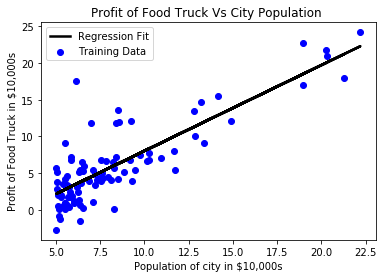

In [168]:
plt.scatter(ex1df.iloc[:,0],ex1df.iloc[:,1],color = "blue", label= "Training Data" )
plt.plot(ex1df.iloc[:,0],predictions, lw = 2.5, c = "k", label = "Regression Fit")
plt.xlabel("Population of city in $10,000s")
plt.ylabel("Profit of Food Truck in $10,000s")
plt.title("Profit of Food Truck Vs City Population ")
plt.legend()
plt.show()

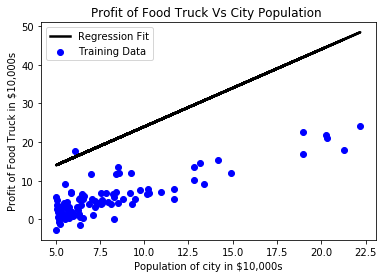

In [159]:
# Plot With Different Values of theta:
theta_subopt = np.array([[4],[2]])
predictions_subopt = X.dot(theta_subopt)
plt.scatter(ex1df.iloc[:,0],ex1df.iloc[:,1],color = "blue", label= "Training Data" )
plt.plot(ex1df.iloc[:,0],predictions_subopt, lw = 2.5, c = "k", label = "Regression Fit")
plt.xlabel("Population of city in $10,000s")
plt.ylabel("Profit of Food Truck in $10,000s")
plt.title("Profit of Food Truck Vs City Population ")
plt.legend()
plt.show()

## Predictions

In [173]:
# For a population of size 35,000, the profit is:
prediction1 = theta.T.dot(np.array([[1],[3.5]]))
print("For population of 35,000 we predict a profit \
of {profit}".format(profit=prediction1[0,0]*10000))

For population of 35,000 we predict a profit of 4519.767849999998


In [174]:
# For a population of size 200,000 the profit is:
prediction1 = theta.T.dot(np.array([[1],[20]]))
print("For population of 200,000 we predict a profit \
of {profit}".format(profit=prediction1[0,0]*10000))

For population of 200,000 we predict a profit of 196969.5556
